# Linear Regression 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

### Data  
Divide a circle into 100 points  
$y_i$ is the next point of $x_i$

In [16]:
n = 100
theta = np.linspace(0, 2 * np.pi, n).reshape(n, 1)
x = np.concatenate((np.cos(theta), np.sin(theta)), axis=1) 
y = np.roll(x, -1, axis=0)

### Model

We model the map from $x_i$ to $y_i$ as a linear model $\hat{y}_i = W x_i + b$  
$W$: Weight matrix  
$b$: Bias  
Q: What are the dimensions of $W$ and $b$?

In [4]:
def linear_model(W, b, x):
    return np.matmul(W, x) + b

### Optimization
Minimize the mean square error  
$L = \frac{1}{n} \sum_i ||\hat{y}_i - y_i||_2^2$

### Closed form solution
$X$ is a $n \times 3$ matrix containing all $[x_i, 1]$  
$Y$ is a $n \times 2$ matrix containing all $y_i$  
$U = [W, b]^T$  
$L = \frac{1}{n} ||X U - Y||_F^2$  
$||*||_F$ (Frobenius Norm)  

$\frac{\partial L}{\partial U} = 2(XU −Y)^T X$  

Let $\frac{\partial L}{\partial U} = 0$  
$U = (X^T X)^{-1} X^T Y$


In [257]:
X = np.concatenate((x, np.ones((n, 1))), axis=1)

In [258]:
X.shape

(100, 3)

In [259]:
U = np.matmul(
    np.matmul(
        np.linalg.inv(np.matmul(np.transpose(X), X)),
        np.transpose(X)),
    y)
    

In [260]:
U

array([[ 9.98026153e-01,  6.21803134e-02],
       [-6.34239197e-02,  9.97986676e-01],
       [ 1.97384660e-05, -6.21803134e-04]])

Compare to the numpy linear regression result

In [261]:
U_lstsq = np.linalg.lstsq(x, y, rcond=None)

In [262]:
U_lstsq

(array([[ 0.99802654,  0.062168  ],
        [-0.06342392,  0.99798668]]),
 array([3.97320486e-06, 3.94293827e-03]),
 2,
 array([7.1063352 , 7.03562364]))

Try to draw a circle

In [263]:
W = np.transpose(U[:2, :])
b = U[2, :].reshape(2, 1)
x_0 = np.array([1.0, 0]).reshape(2, 1)
x_now = x_0
x_list = np.zeros((1000, 2, 1))
x_list[0] = x_0
for i in range(1000 - 1):
    x_next = linear_model(W, b, x_now)
    x_list[i+1] = x_next
    x_now = x_next

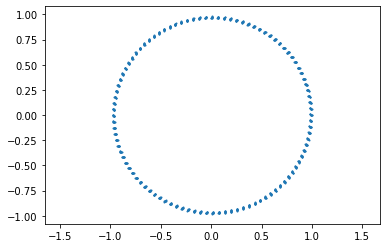

In [264]:
plt.scatter(x_list[:, 0, :], x_list[:, 1, :], s=1)
plt.axis('equal')
plt.show()

### Gradient Descent  
Randomly initialize the parameters to some value and iteratively update through the direction of gradient.  
$U_{new} = U - \alpha (\frac{\partial L}{\partial U})^T$

In [265]:
# inpect the shape of tensors:
print(X.shape)
print(U.shape)
print(y.shape)

(100, 3)
(3, 2)
(100, 2)


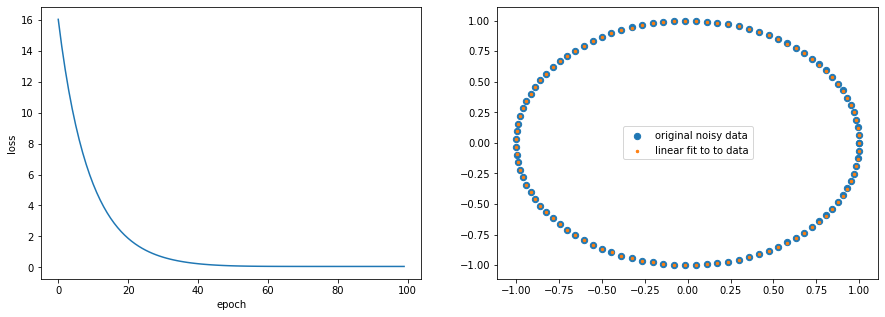

In [266]:
# code here
lr = 0.001

n = 100
theta = np.linspace(0, 2 * np.pi, n).reshape(n, 1)
x = np.concatenate((np.cos(theta), np.sin(theta)), axis=1) 
y = np.roll(x, -1, axis=0)

LOSS = []
U = np.random.randn(*U.shape)
for i in range(100):
    grad = 2*(X.dot(U) - y).T.dot(X)
    U -= lr * grad.T
    loss = np.linalg.norm(X.dot(U) - y)
    LOSS.append(loss)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(LOSS)
plt.xlabel('epoch')
plt.ylabel('loss')

# now let's see what we've got:
y_hat = U.T.dot(X.T)
plt.subplot(1,2,2)
plt.scatter(y.T[0,:], y.T[1,:], s = 40, label='original noisy data')
plt.scatter(y_hat[0,:], y_hat[1,:],  s = 6, label='linear fit to to data')
plt.legend()


## Try to add some noise (unbiased!) to the initial data and verify whether the model works on noisy data

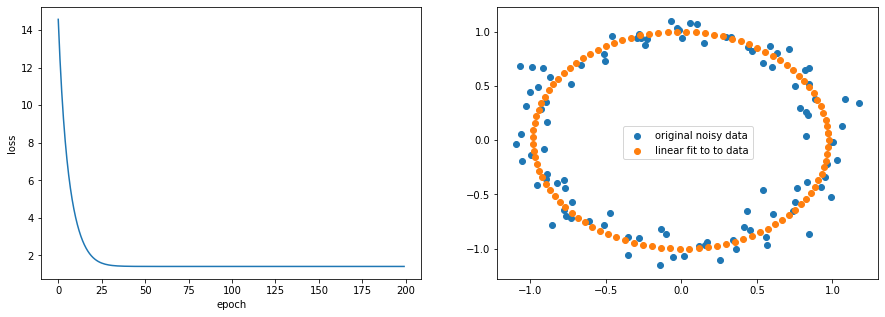

In [267]:
# refresh the data:
n = 100
theta = np.linspace(0, 2 * np.pi, n).reshape(n, 1)
x = np.concatenate((np.cos(theta), np.sin(theta)), axis=1) 
y = np.roll(x, -1, axis=0)

# add normally distributed noise to our labels:
y += 0.1 * np.random.randn(*y.shape)
lr = 0.001

LOSS = []
U = np.random.randn(*U.shape)
for i in range(200):
    grad = 2*(X.dot(U) - y).T.dot(X)
    U -= lr * grad.T # we go against the gradient (towards zero grad)
    loss = np.linalg.norm(X.dot(U) - y)
    LOSS.append(loss)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(LOSS)
plt.xlabel('epoch')
plt.ylabel('loss')

# now let's see what we've got:
y_hat = U.T.dot(X.T)
plt.subplot(1,2,2)
plt.scatter(y.T[0,:], y.T[1,:], label='original noisy data')
plt.scatter(y_hat[0,:], y_hat[1,:], label='linear fit to to data')
plt.legend()


# Feedforward Neural Network

### Data 
For simplicity we translate & scale the circle to the range (0, 1)

In [7]:
n = 100
theta = np.linspace(0, 2 * np.pi, n).reshape(n, 1)
x = np.concatenate((0.25 * np.cos(theta) + 0.5, 0.25 * np.sin(theta) + 0.5), axis=1) 
y = np.roll(x, -1, axis=0)

In [269]:
print(x.shape, y.shape)

(100, 2) (100, 2)


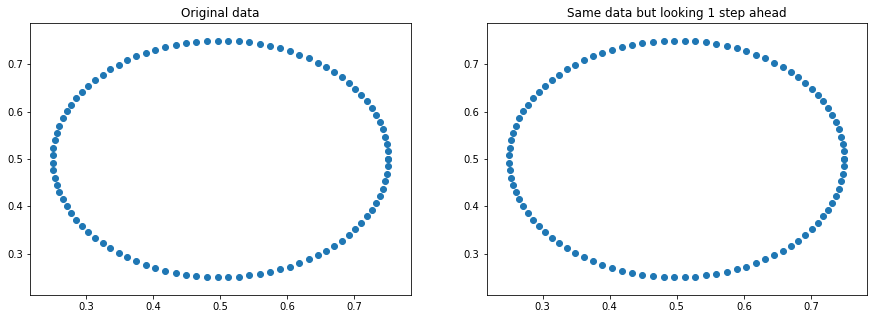

In [270]:
# let's inspect the data:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(x[:,0], x[:,1])
plt.title('Original data')
plt.subplot(1,2,2)
plt.title('Same data but looking 1 step ahead')
plt.scatter(y[:,0], y[:,1])


### Model

We model the map from $x$ to $y$ as a multi-layer perceptron (MLP)  
$h = \sigma(W_1 x + b_1)$  
$\hat{y} = \sigma(W_2 h + b_2)$  
$\sigma(*)$ is the activation function to introduce non-linearity  
We use the sigmoid function in this model  $s(t) = \frac{1}{1 + e^{-t}}$  
An interesting fact: the derivative of sigmoid can be easily represented by the function value  $s'(t) = s(t) (1 - s(t))$  
Q: What are the dimensions of $W_1, W_2$ and $b_1, b_2$?

### Gradient Descent
$W_1, W_2, b_1, b_2$ are the parameters  
To make life easier, add more variables, and draw a computational graph  
consider only one sample (x, y)  
$u_1 = W_1 x + b_1$  
$h = \sigma(u_1)$  
$u_2 = W_2 h + b_2$  
$\hat{y} = \sigma(u_2)$  
$L = ||\hat{y} - y||_2^2$

First, calculate the result and loss by the model (Forward propagation)  
Then, caculate the gradient in the reverse topological order, using the chain rule  

$\frac{\partial L}{\partial \hat{y}} = (\hat{y} - y)^T$  

$\frac{\partial L}{\partial u_2} = \frac{\partial L}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial u_2} = \frac{\partial L}{\partial \hat{y}} diag(\hat{y} (1 - \hat{y}))$  

$\frac{\partial L}{\partial h} = \frac{\partial L}{\partial u_2} \frac{\partial u_2}{\partial h} = \frac{\partial L}{\partial u_2} W_2$  

$\frac{\partial L}{\partial u_1} = \frac{\partial L}{\partial h} \frac{\partial h}{\partial u_1} = \frac{\partial L}{\partial h} diag(h (1 - h))$ 

The gradient of parameters

$\frac{\partial L}{\partial W_2} = \frac{\partial L}{\partial u_2} \frac{\partial u_2}{\partial W_2} = h \frac{\partial L}{\partial u_2}$  

$\frac{\partial L}{\partial W_1} = \frac{\partial L}{\partial u_1} \frac{\partial u_1}{\partial W_1} = x \frac{\partial L}{\partial u_1}$  

$\frac{\partial L}{\partial b_2} = \frac{\partial L}{\partial u_2} \frac{\partial u_2}{\partial b_2} = \frac{\partial L}{\partial u_2}$  

$\frac{\partial L}{\partial b_1} = \frac{\partial L}{\partial u_1} \frac{\partial u_1}{\partial b_1} = \frac{\partial L}{\partial u_1}$  

In [13]:
np.random.seed(seed=11)
class MLP():
    
    def __init__(self):
        self.W1 = np.random.randn(2,3)
        self.W2 = np.random.randn(3,2)
        self.b1 = np.random.randn(3,1)
        self.b2 = np.random.randn(2,1)
        self.x =     np.zeros((2,1))
        self.y =     np.zeros((2,1))
        self.y_hat = np.zeros((2,1))
        self.h =     np.zeros((3,1))
        self.u1 =    np.zeros((3,1))
        self.u2 =    np.zeros((2,1))
        self.sample_loss = 0.0
        self.batch_loss  = []
        self.zero_grad()

    def zero_grad(self):
        self.dLdy  = np.zeros_like(self.y)
        self.dLdu1  = np.zeros_like(self.u1)
        self.dLdh  = np.zeros_like(self.h)
        self.dLdu2  = np.zeros_like(self.u2)
        self.dLdW1 = np.zeros_like(self.W1)
        self.dLdW2 = np.zeros_like(self.W2)
        self.dLdb1 = np.zeros_like(self.b1)
        self.dLdb2 = np.zeros_like(self.b2)
        self.batch_loss = []
        
    def sigmoid(self, x, derivative=False):
#         res = 1. / (1. + np.exp(-x))
        res = np.tanh(x)
        if derivative:
            return 1 - np.tanh(x)**2
        return res
        
    # forward pass:
    def forward(self):
        self.u1 = self.x.T.dot(self.W1).reshape(-1,1) + self.b1
        self.h = self.sigmoid(self.u1)
        self.u2 = self.h.T.dot(self.W2).reshape(-1,1) + self.b2
        self.y_hat = self.sigmoid(self.u2)
        self.sample_loss = (np.linalg.norm(self.y_hat - self.y))**2

    # backward pass:
    def backward(self):
        self.dLdy  += 2 * (self.y_hat - self.y)
        self.dLdu2 += self.dLdy * self.sigmoid(self.u2, derivative=True)
        self.dLdh  += self.W2.dot(self.dLdu2).reshape(-1,1)
        self.dLdu1 += (self.dLdh * self.sigmoid(self.u1, derivative=True)).reshape(-1,1)
        self.dLdW1 += self.x.dot(self.dLdu1.T)
        self.dLdW2 += self.h.dot(self.dLdu2.T)
        self.dLdb1 += self.dLdu1
        self.dLdb2 += self.dLdu2
        self.batch_loss.append(self.sample_loss)

    def step(self, lrate):
        self.W1 -= lrate * self.dLdW1
        self.W2 -= lrate * self.dLdW2
        self.b1 -= lrate * self.dLdb1
        self.b2 -= lrate * self.dLdb2

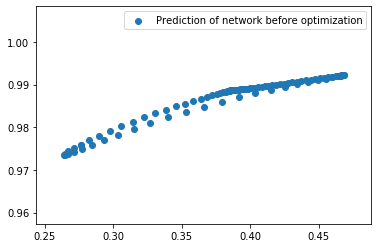

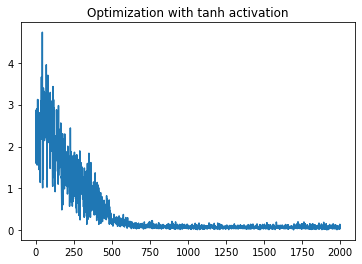

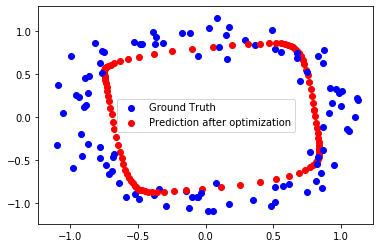

In [15]:
%matplotlib inline
np.random.seed(seed=9)
mlp = MLP()


n = 100
theta = np.linspace(0, 2 * np.pi, n).reshape(n, 1)
x = np.concatenate((np.cos(theta), np.sin(theta)), axis=1) 
y = np.roll(x, -1, axis=0)
# add normally distributed noise to our labels:
y += 0.1 * np.random.randn(*y.shape)

plt.figure()
out = []
for idx in range(100):
    mlp.x = x[idx,:].reshape(-1,1)
    mlp.forward()
    out.append(mlp.y_hat)
out = np.hstack(out)
plt.scatter(out[0,:], out[1,:], label='Prediction of network before optimization')
plt.legend()

epochs = 2000
batch_size = 5
lrate = 0.01

loss = []
for epoch in range(epochs):
    mlp.zero_grad()
    for i in range(batch_size):
        idx = np.random.randint(100)
#         idx = i
        mlp.x = x[idx,:].reshape(-1,1)
        mlp.y = y[idx,:].reshape(-1,1)
        mlp.forward()
        mlp.backward()
    mlp.step(lrate/batch_size)
    loss.append(np.mean(mlp.batch_loss))
plt.figure()
plt.plot(loss)
plt.title('Optimization with tanh activation')

plt.figure()
out = []
for idx in range(100):
    mlp.x = x[idx,:].reshape(-1,1)
    plt.scatter(y[idx,0], y[idx,1], c='b')
    mlp.forward()
    plt.scatter(mlp.y_hat[0,0], mlp.y_hat[1,0], c='r')
plt.legend(['Ground Truth', 'Prediction after optimization'])

## MLP (Kaggle-like)

In [378]:
n = 100
theta = np.linspace(0, 2 * np.pi, n).reshape(n, 1)
x = np.concatenate((np.cos(theta)+0.1, np.sin(theta)+0.1), axis=1) 
y = np.roll(x, -1, axis=0)
# add normally distributed noise to our labels:
y += 0.03 * np.random.randn(*y.shape)

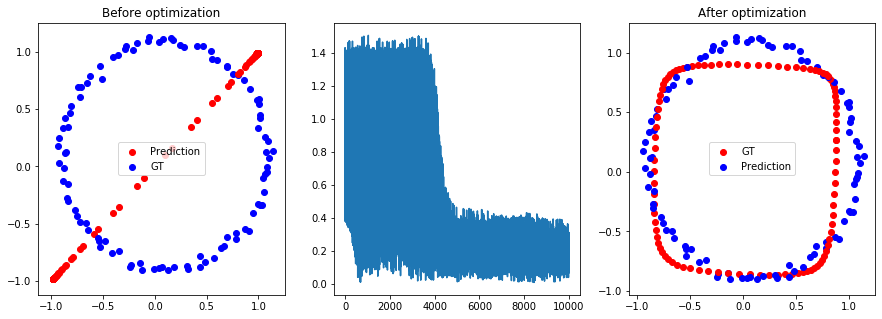

In [304]:
act_fun = 'tanh'

# sigmoid and its derivative
def act(x, fun='sig', der=False):
    if fun=='tanh':
        res = np.tanh(x)
        if der:
            res = 1 - res**2
    if fun=='sig':
        res = 1./(1 + np.exp(-x))
        if der:
            res = res * (1 - res)
    return res

def sigmoid_deriv(x):
    return 1 - np.tanh(x)

    
#Weights
w0 = 0.000001*np.random.random((2, 3)) - 1 #for input   - 4 inputs, 3 outputs
w1 = 0.000001*np.random.random((3, 2)) - 1 #for layer 1 - 5 inputs, 3 outputs

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Before optimization')
for j in range(100):
    layer0 = x[j,:].reshape(1,-1)
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    plt.scatter(layer2[0,0], layer2[0,1], c='r')
    plt.scatter(y[j,0], y[j,1], c='b')
plt.legend(['Prediction', 'GT'])


#learning rate
n = 0.01

#Errors - for graph later
errors = []

#Train
for i in range(10000):
    j = np.random.choice(100)

    #Feed forward
    layer0 = x[j,:].reshape(1,-1)
    layer1 = act(np.dot(layer0, w0), fun=act_fun)
    layer2 = act(np.dot(layer1, w1), fun=act_fun)

    #Back propagation using gradient descent
    layer2_error = y[j,:] - layer2
    layer2_delta = layer2_error * act(layer2, fun=act_fun, der=True)

    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * act(layer1, fun=act_fun, der=True)

    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    errors.append(np.abs(layer2_error).sum())


plt.subplot(1,3,2)
plt.plot(errors)

plt.subplot(1,3,3)
plt.title('After optimization')
for j in range(100):
    layer0 = x[j,:].reshape(1,-1)
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    plt.scatter(layer2[0,0], layer2[0,1], c='r')
    plt.scatter(y[j,0], y[j,1], c='b')
plt.legend(['GT', 'Prediction'])
    

# MLP in PyTorch

In [379]:
np.random.seed(seed=10)

import matplotlib.pyplot as plt
%matplotlib inline

import torch
from torch.autograd import Variable
import torch.optim as optim

def generate_data():
    n = 100
    theta = np.linspace(0, 2 * np.pi, n).reshape(n, 1)
    x = np.concatenate((0.25 * np.cos(theta) + 0.5, 0.25 * np.sin(theta) + 0.5), axis=1) 
    y = np.roll(x, -1, axis=0)
    return x, y

class net():
    
    def __init__(self, act):
        self.act = act
        self.W1 = Variable(torch.rand(3,2), requires_grad=True)
        self.W2 = Variable(torch.rand(2,3), requires_grad=True)
        self.b1 = Variable(torch.rand(3,1), requires_grad=True)
        self.b2 = Variable(torch.rand(2,1), requires_grad=True)

        self.u1 = torch.rand(2,1)
        self.u2 = torch.rand(2,1)
        self.h = torch.rand(3,1)
                
    def activate(self, X):
        if self.act == 'sig':
            return 1. /(1. + torch.exp(-X))
        if self.act == 'tanh':
            return torch.tanh(X)
    
    def optimize(self, lr):
        self.W1.data -= lr * self.W1.grad.data
        self.W2.data -= lr * self.W2.grad.data
        self.b1.data -= lr * self.b1.grad.data
        self.b2.data -= lr * self.b2.grad.data        

    def forward(self, x):
        self.u1 = self.W1.mm(x) + self.b1 # + self.Wr.mm(self.h_prev)
        self.h =  self.activate(self.u1)
        self.u2 = self.W2.mm(self.h) + self.b2
        y_hat = self.activate(self.u2)
        return y_hat
        

x, y = generate_data()
y += 0.03 * np.random.randn(*y.shape)

x = torch.tensor(x, dtype=torch.float).view(-1,2)
y = torch.tensor(y, dtype=torch.float).view(-1,2)

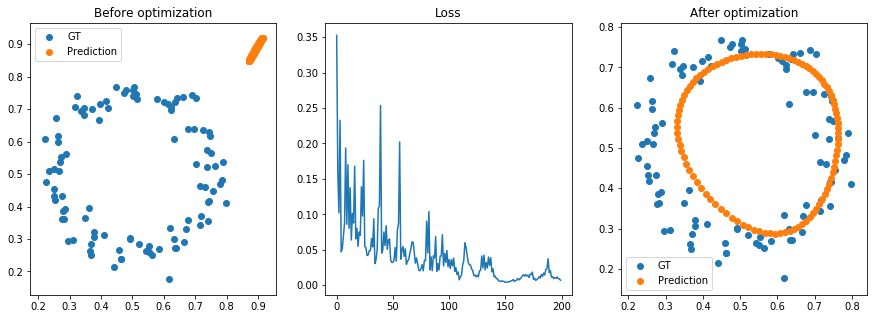

In [380]:
activation_fun = 'tanh'

np.random.seed(seed=10)
n = net(activation_fun)

plt.figure(figsize=(15,5))
y_hat_0 = np.zeros((100,2))
for i in range(100):
    y_hat_0[i,:] = n.forward(x[i,:].view(2,1)).view(1,2).detach().numpy()
plt.subplot(1,3,1)
plt.title('Before optimization')
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_hat_0[:,0], y_hat_0[:,1])
plt.legend(['GT', 'Prediction'])

EPOCHS = 200
batch_size = 100
lr = 0.01


loss = []
for epoch in range(EPOCHS):
    batch_loss = []
    for b in range(batch_size):
        b = np.random.choice(100, replace=False)
        y_hat = n.forward(x[b,:].view(2,1))
        L = torch.norm(y_hat - y[b,:].view(-1,1)).pow(2)
        batch_loss.append(L.item())
        L.backward(retain_graph=True)
#         n.h_prev = n.h_curr
    n.optimize(lr)
    for i in [n.W1, n.W2, n.b1, n.b2]: # , n.Wr
        i.grad.data.zero_()
    loss.append(np.mean(batch_loss))
    
plt.subplot(1,3,2)
plt.title('Loss')
plt.plot(loss)
y_hat = np.zeros((100,2))
for i in range(100):
    y_hat[i,:] = n.forward(x[i,:].view(2,1)).view(1,2).detach().numpy()

plt.subplot(1,3,3)
plt.title('After optimization')
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_hat[:,0], y_hat[:,1])
plt.legend(['GT', 'Prediction'])

# same but instead of tanh, we use sigmoid for activation. 
### The network cannot fit the data

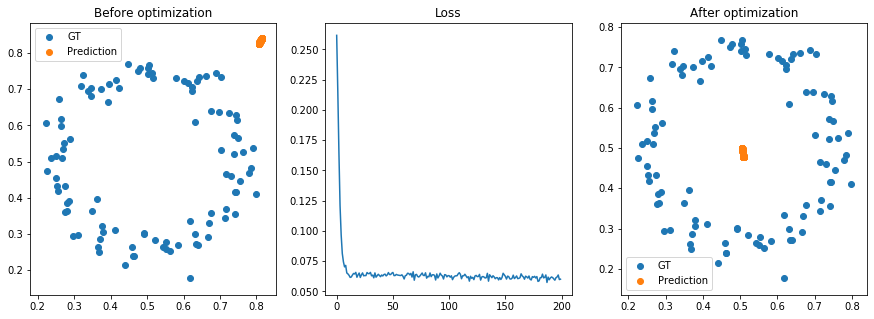

In [381]:
activation_fun = 'sig'

np.random.seed(seed=10)
n = net(activation_fun)

plt.figure(figsize=(15,5))
y_hat_0 = np.zeros((100,2))
for i in range(100):
    y_hat_0[i,:] = n.forward(x[i,:].view(2,1)).view(1,2).detach().numpy()
plt.subplot(1,3,1)
plt.title('Before optimization')
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_hat_0[:,0], y_hat_0[:,1])
plt.legend(['GT', 'Prediction'])

EPOCHS = 200
batch_size = 100
lr = 0.01


loss = []
for epoch in range(EPOCHS):
    batch_loss = []
    for b in range(batch_size):
        b = np.random.choice(100, replace=False)
        y_hat = n.forward(x[b,:].view(2,1))
        L = torch.norm(y_hat - y[b,:].view(-1,1)).pow(2)
        batch_loss.append(L.item())
        L.backward(retain_graph=True)
#         n.h_prev = n.h_curr
    n.optimize(lr)
    for i in [n.W1, n.W2, n.b1, n.b2]: # , n.Wr
        i.grad.data.zero_()
    loss.append(np.mean(batch_loss))
    
plt.subplot(1,3,2)
plt.title('Loss')
plt.plot(loss)
y_hat = np.zeros((100,2))
for i in range(100):
    y_hat[i,:] = n.forward(x[i,:].view(2,1)).view(1,2).detach().numpy()

plt.subplot(1,3,3)
plt.title('After optimization')
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_hat[:,0], y_hat[:,1])
plt.legend(['GT', 'Prediction'])